In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_palette('PiYG')
# sns.set_theme()


In [3]:
df = pd.read_csv("cleaned.csv")
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,csat_score,is_credit_product
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,0,banki.ru,кредитные карты,Кредитные карты,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN,True
1,2025-03-24 20:06:00,2025-03-28 17:42:39.772,6601bfab426e4f56cc1e44d859683763,Страховая,1,0,banki.ru,страховая,Страхование,Не определено,страховое событие,жалоба по страховому случаю,"Обратился по каско , влетел камень в лобовое с...",проблема решена,M,NaN,NaN,NaN,РФ,NaN,NaN,NaN,NaN,NaN,NaN,False
2,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,1,banki.ru,депозитные продукты,Дебетовые карты,Не определено,мп/лк/терминал,установка/обновление приложения,Я уже очень давно пользуюсь услугами Тбанка и ...,не указано,M,GRD,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN,False
3,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,1,banki.ru,sme,Бизнес-продукты,Не определено,дополнительные услуги,консультация по услуге,"Уважаемое руководство Т- Банка,\n\n\nНастоящим...",не указано,F,GRD,MAR,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,NaN,False
4,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,1,banki.ru,депозитные продукты,Дебетовые карты,Не определено,кэшбек,корректировка кэшбека,Выбрал на текущий месяц повышенный кэшбек на к...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56815,NaN,2025-05-23 19:25:21.222,19a90f722e0088dbd5c1140326475d4c,Страховая,5,1,banki.ru,страховая,Страхование,Не определено,страховое событие,консультации по существующему страховому событию,Отдыхали в новый год в Тель-Авиве с ребёнком. ...,не указано,M,NaN,DIV,0.0,РФ,NaN,NaN,NaN,NaN,NaN,NaN,False
56816,NaN,2025-09-26 13:27:02.360,3e5ccb5ffa7055f82085ccd18b7190c4,Банк,5,1,sravni.ru,поддержка сотрудников,Не определено,Не определено,тарифы и условия,консультация по продукту,Здравствуйте я очень довольна работой группы п...,не указано,F,GRD,CIV,0.0,РФ,Доходные,0.0,0.0,0.0,Сеньоры,NaN,False
56817,NaN,2025-10-23 19:20:28.205,ff8dee14ae0b2c22593ab20ffb9d8e26,Банк,5,1,sravni.ru,депозитные продукты,Дебетовые карты,Не определено,мп/лк/терминал,консультация по интерфейсу,Банк и прилодение\nПо моему мнению лучший банк...,не указано,M,NaN,MAR,0.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,NaN,False
56818,NaN,2025-09-02 13:35:01.523,b8deb649421f64fc4a5b6c71b350f528,Банк,5,1,banki.ru,премиальные сервисы,Премиальные продукты,Не определено,"платежи, переводы и операции",отмена / оспаривание,Огромная благодарность сотруднику Т-Банка (Лео...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,NaN,False


In [4]:
super_group_map = {
    'Кредитные карты': 'Кредитные продукты',
    'Страхование': 'Страхование',
    'Дебетовые карты': 'Дебетовые карты',
    'Бизнес-продукты': 'Бизнес-продукты',
    'Залоговые кредиты': 'Кредитные продукты',
    'Инвестиции и брокерские счета': 'Сберегательные и инвестиционные продукты',
    'Не определено': 'Не определено',
    'Потребительские кредиты наличными': 'Кредитные продукты',
    'Премиальные продукты': 'Небанковские сервисы и лояльность',
    'Автокредиты': 'Кредитные продукты',
    'Lifestyle-сервисы': 'Небанковские сервисы и лояльность',
    'Рассрочка и кредиты в покупках': 'Кредитные продукты',
    'Мобильная связь': 'Небанковские сервисы и лояльность',
    'Подписки': 'Небанковские сервисы и лояльность',
    'Ипотека и ипотечное рефинансирование': 'Кредитные продукты',
    'Банкоматы': 'Банкоматы',
    'Вклады и накопительные продукты': 'Сберегательные и инвестиционные продукты',
    'Проблемная задолженность': 'Риск и проблемная задолженность',
}

df["product_kind"] = df["product"].map(super_group_map)

In [5]:
df["product_kind"].unique()

array(['Кредитные продукты', 'Страхование', 'Дебетовые карты',
       'Бизнес-продукты', 'Сберегательные и инвестиционные продукты',
       'Не определено', nan, 'Небанковские сервисы и лояльность',
       'Банкоматы', 'Риск и проблемная задолженность'], dtype=object)

In [6]:
CREDIT_PRODUCTS = ["Кредитные карты", "Потребительские кредиты наличными", "Автокредиты", "Рассрочка и кредиты в покупках", "Ипотека и ипотечное рефинансирование", "Залоговые кредиты", "Проблемная задолженность"]

df["is_credit_product"] = df["product"].apply(lambda x: x in CREDIT_PRODUCTS)
product_stats = (
    df.groupby(['product', 'is_credit_product'])['review_emotion']
      .agg(share_positive='mean', count='size')
      .reset_index()
)

Text(0.5, 1.0, 'Product Review Positivity vs. Number of Reviews')

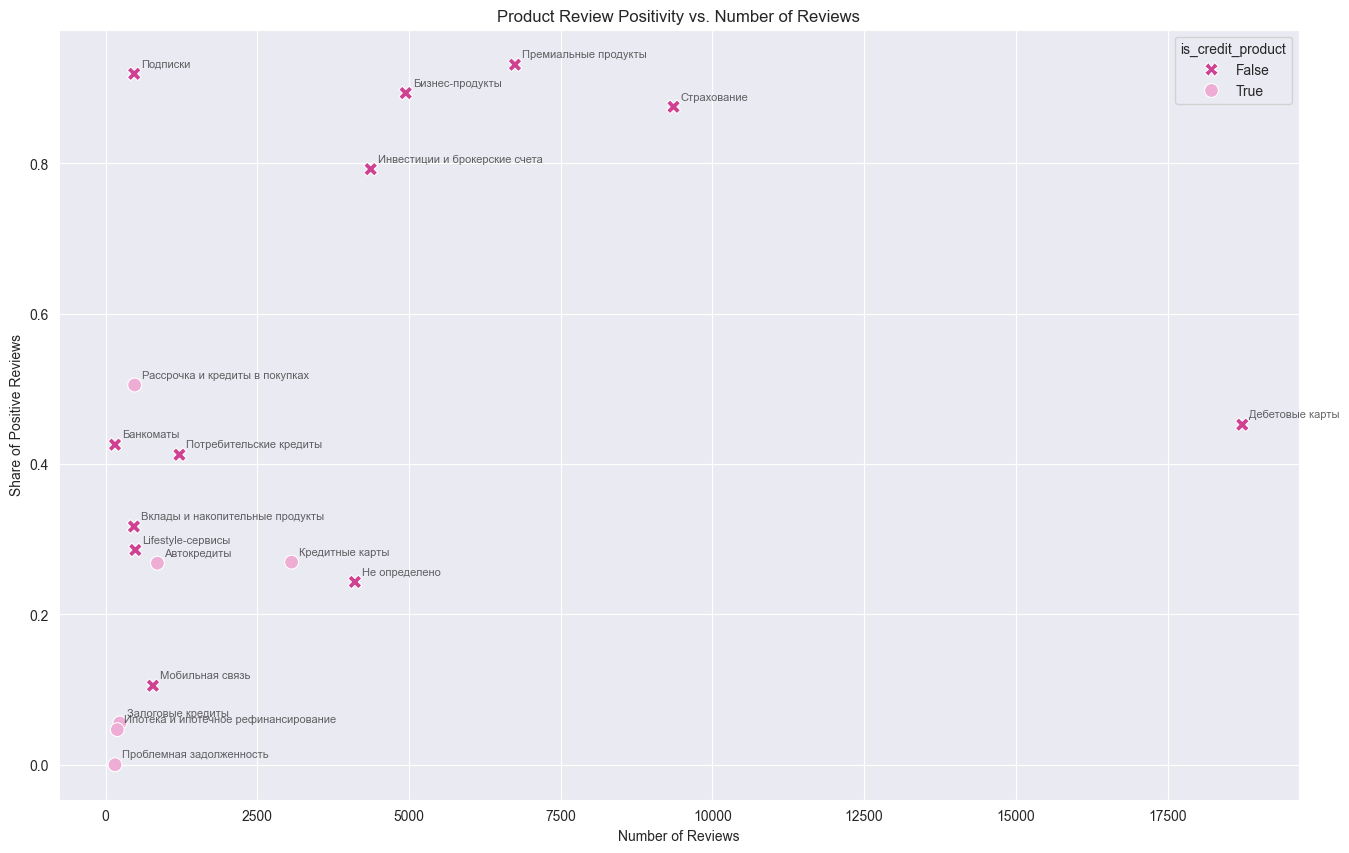

In [7]:
plt.figure(figsize=(16, 10))

sns.scatterplot(data=product_stats, x='count', y='share_positive', hue='is_credit_product', style='is_credit_product', markers={True: 'o', False: 'X'}, s=100)

for idx, row in product_stats.iterrows():
    plt.annotate(row['product'], 
                 (row['count'], row['share_positive']),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=8,
                 alpha=0.7)

plt.xlabel('Number of Reviews')
plt.ylabel('Share of Positive Reviews')
plt.title('Product Review Positivity vs. Number of Reviews')

Text(0.5, 1.0, 'Product Review Negativity vs. Number of Reviews')

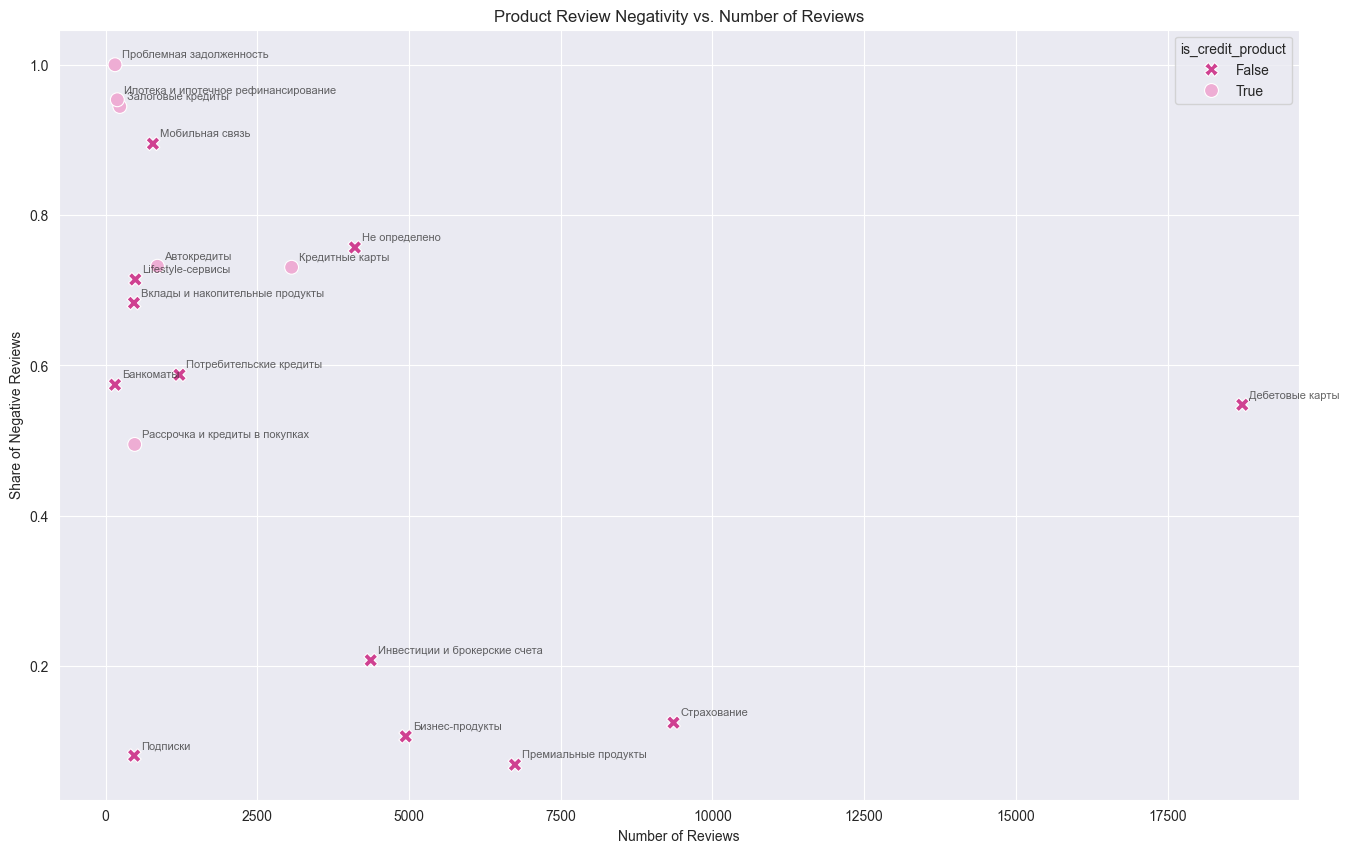

In [8]:
product_stats["share_negative"] = 1 - product_stats["share_positive"]
plt.figure(figsize=(16, 10))
sns.color_palette(palette='PuRd')

sns.scatterplot(data=product_stats, x='count', y='share_negative', hue='is_credit_product', style='is_credit_product', markers={True: 'o', False: 'X'}, s=100)

for idx, row in product_stats.iterrows():
    plt.annotate(row['product'], 
                 (row['count'], row['share_negative']),
                 xytext=(5, 5),
                 textcoords='offset points',
                 fontsize=8,
                 alpha=0.7)

plt.xlabel('Number of Reviews')
plt.ylabel('Share of Negative Reviews')
plt.title('Product Review Negativity vs. Number of Reviews')

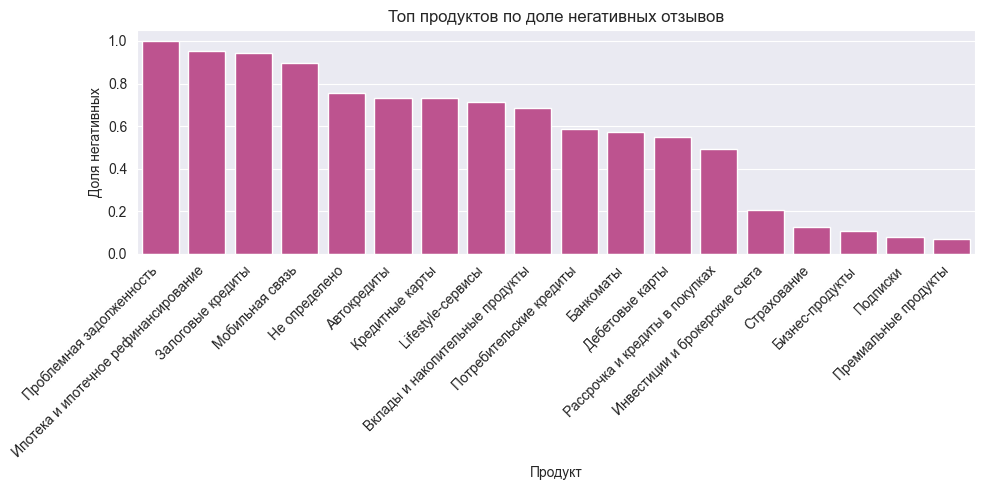

In [9]:
top_products = (
    product_stats
    .sort_values('share_negative', ascending=False)
)

plt.figure(figsize=(10, 5))
sns.color_palette(palette='PuRd')

sns.barplot(
    data=top_products,
    x='product',
    y='share_negative'
)
plt.title(f'Топ продуктов по доле негативных отзывов')
plt.xlabel('Продукт')
plt.ylabel('Доля негативных')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

10257


,reason,count
0,Не определено,8757
1,блокировка/разблокировка карты,135
2,ограничение операций,94
3,документы,83
4,акции,79
5,оспаривание операций,68
6,кэшбэк,57
7,общая информация,54
8,обработка обращений по запросу документов фл aml,52
9,встречи,47


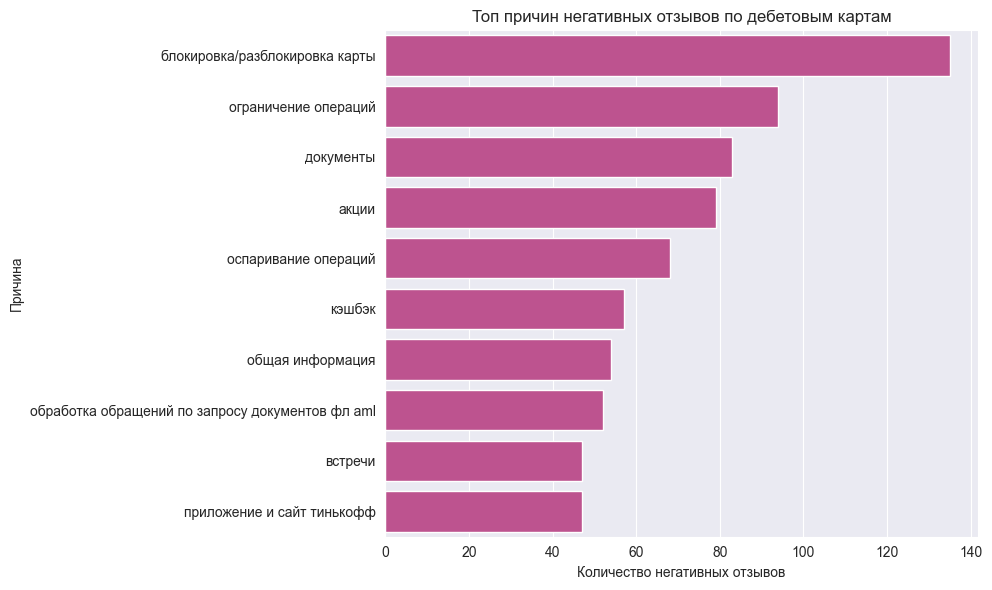

In [10]:
dc_neg = df[
    (df['product'] == 'Дебетовые карты') &
    (df['review_emotion'] == 0)
].copy()

print(len(dc_neg))

reason_stats = (
    dc_neg['reason']
    .fillna('Не определено')
    .value_counts()
    .reset_index(name='count')
    .rename(columns={'index': 'reason'})
)

display(reason_stats.head(20))

top_reason_stats = reason_stats[reason_stats['reason'] != 'Не определено'].head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_reason_stats,
    y='reason',
    x='count'
)
plt.xlabel('Количество негативных отзывов')
plt.ylabel('Причина')
plt.title('Топ причин негативных отзывов по дебетовым картам')
plt.tight_layout()
plt.show()

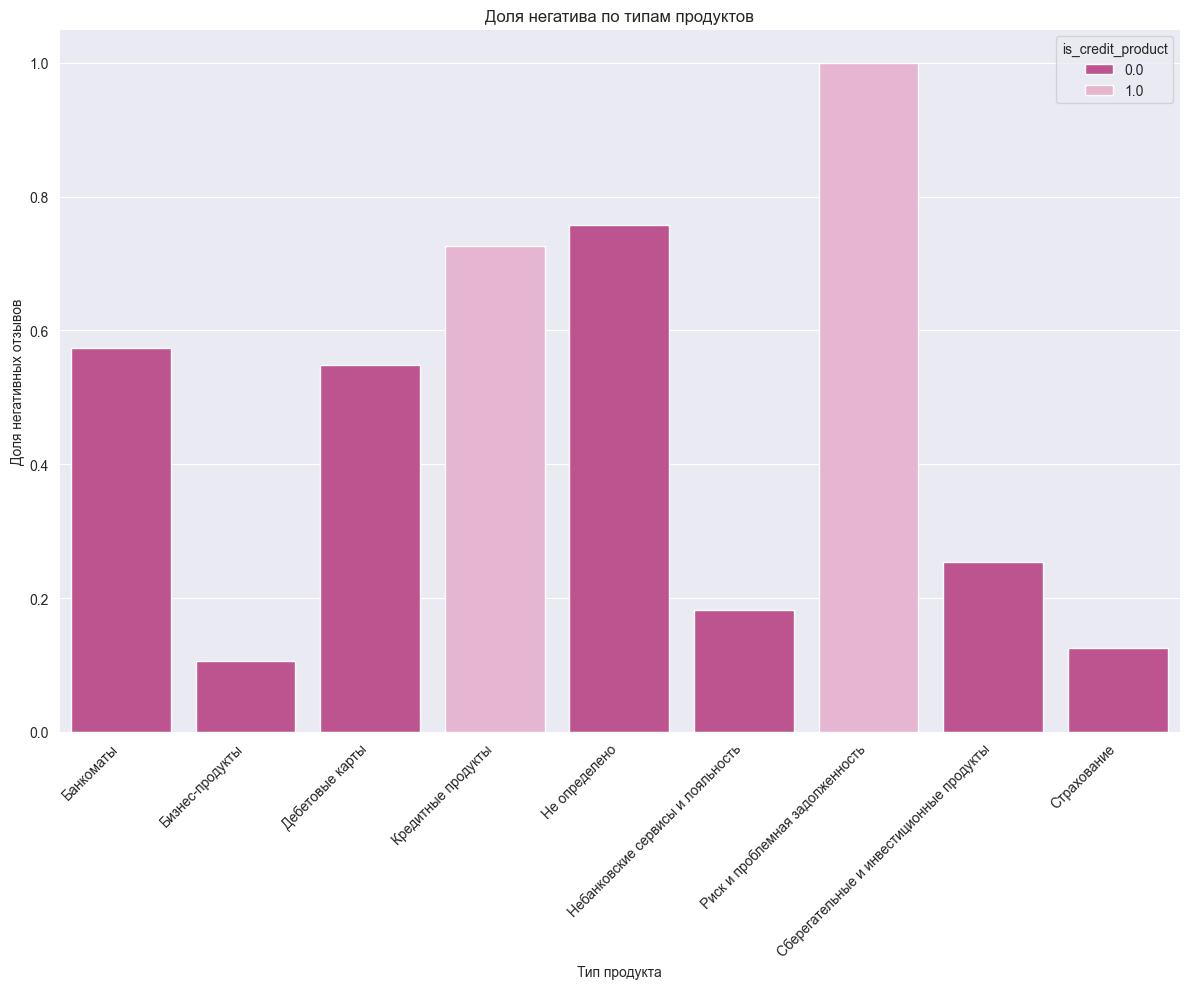

In [11]:
plt.figure(figsize=(12, 10))

kind_stats = (
    df.groupby('product_kind')[['review_emotion', "is_credit_product"]]
      .mean()
      .reset_index()
)
kind_stats['share_negative'] = 1 - kind_stats['review_emotion']

ax = sns.barplot(
    data=kind_stats,
    x='product_kind',
    y='share_negative',
    hue="is_credit_product"
)
plt.xlabel('Тип продукта')
plt.ylabel('Доля негативных отзывов')
plt.title('Доля негатива по типам продуктов')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

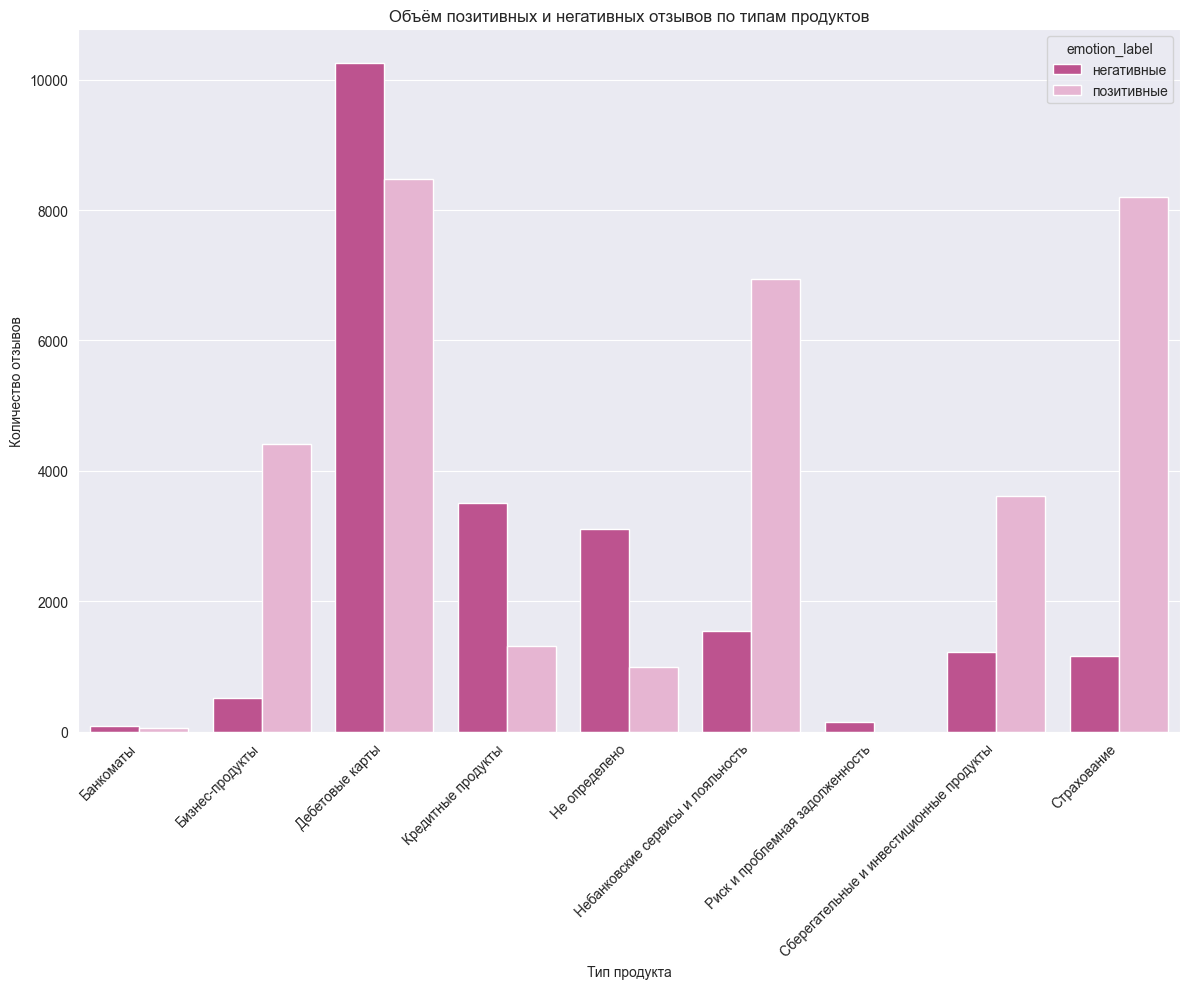

In [12]:
kind_emotion = (
    df.groupby(['product_kind', 'review_emotion'])
      .size()
      .reset_index(name='count')
)

kind_emotion['emotion_label'] = kind_emotion['review_emotion'].map({
    0: 'негативные',
    1: 'позитивные'
})

plt.figure(figsize=(12, 10))
sns.barplot(
    data=kind_emotion,
    x='product_kind',
    y='count',
    hue='emotion_label'
)
plt.xlabel('Тип продукта')
plt.ylabel('Количество отзывов')
plt.title('Объём позитивных и негативных отзывов по типам продуктов')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

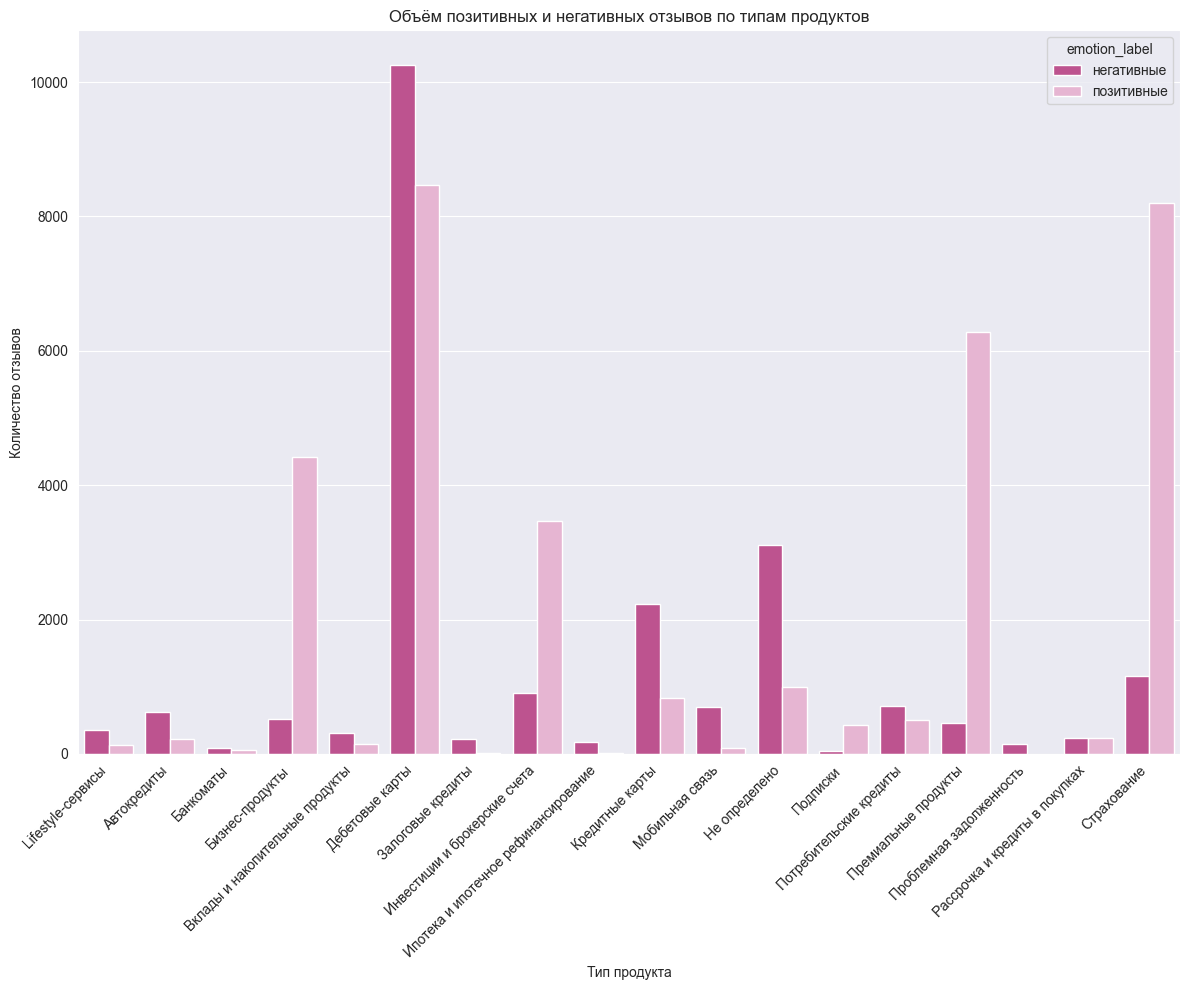

In [13]:
kind_emotion = (
    df.groupby(['product', 'review_emotion'])
      .size()
      .reset_index(name='count')
)

kind_emotion['emotion_label'] = kind_emotion['review_emotion'].map({
    0: 'негативные',
    1: 'позитивные'
})

plt.figure(figsize=(12, 10))
sns.barplot(
    data=kind_emotion,
    x='product',
    y='count',
    hue='emotion_label'
)
plt.xlabel('Тип продукта')
plt.ylabel('Количество отзывов')
plt.title('Объём позитивных и негативных отзывов по типам продуктов')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

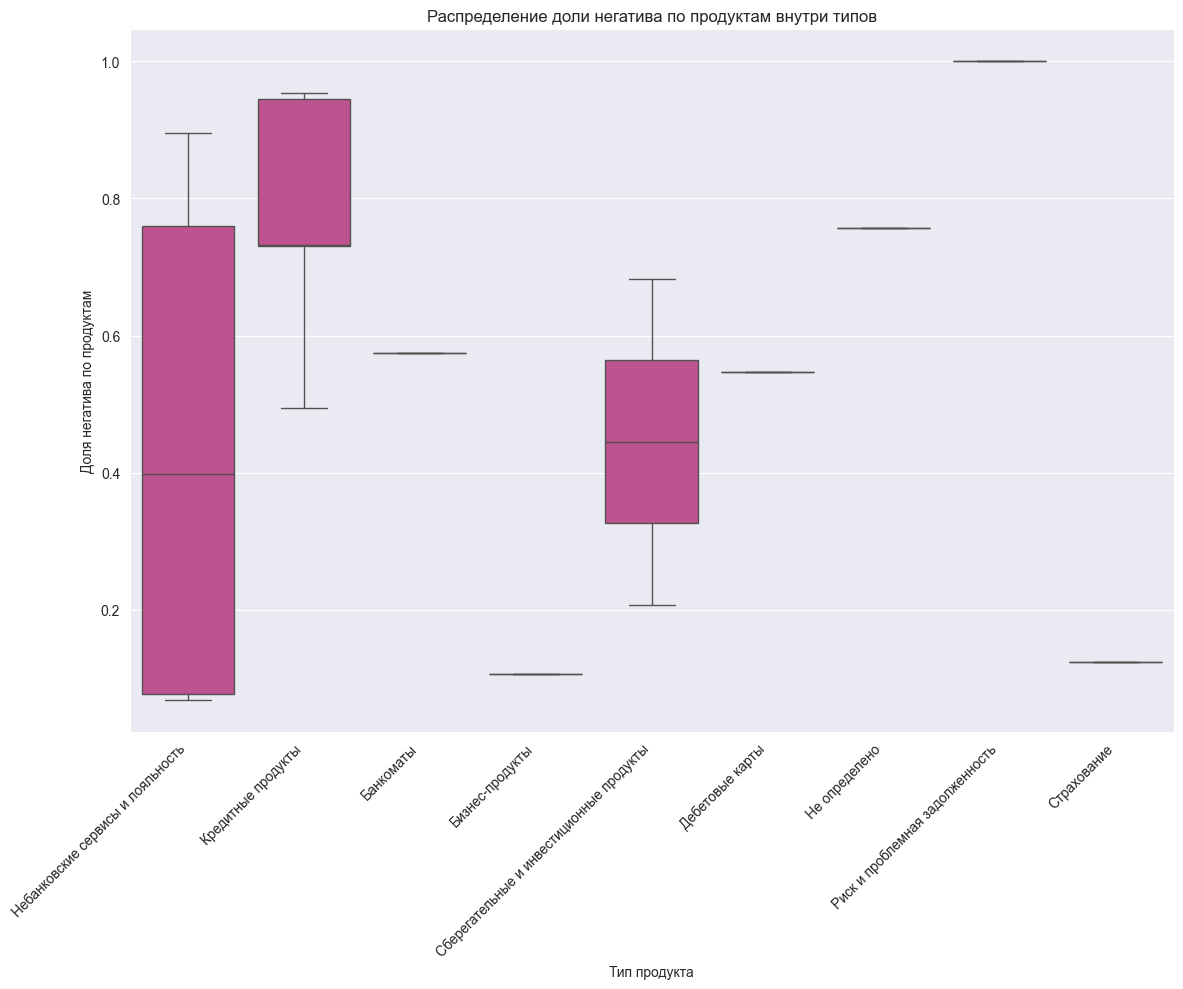

,product,product_kind,share_positive,count,share_negative
14,Проблемная задолженность,Риск и проблемная задолженность,0.000000,155,1.000000
8,Ипотека и ипотечное рефинансирование,Кредитные продукты,0.046632,193,0.953368
6,Залоговые кредиты,Кредитные продукты,0.055556,234,0.944444
10,Мобильная связь,Небанковские сервисы и лояльность,0.105128,780,0.894872
11,Не определено,Не определено,0.243184,4108,0.756816
1,Автокредиты,Кредитные продукты,0.268150,854,0.731850
9,Кредитные карты,Кредитные продукты,0.269494,3065,0.730506
0,Lifestyle-сервисы,Небанковские сервисы и лояльность,0.285714,490,0.714286
4,Вклады и накопительные продукты,Сберегательные и инвестиционные продукты,0.316916,467,0.683084
2,Банкоматы,Банкоматы,0.425806,155,0.574194


In [14]:
prod_stats = (
    df.groupby(['product', 'product_kind'])['review_emotion']
      .agg(share_positive='mean', count='size')
      .reset_index()
)
prod_stats['share_negative'] = 1 - prod_stats['share_positive']

plt.figure(figsize=(12, 10))
sns.boxplot(
    data=prod_stats,
    x='product_kind',
    y='share_negative'
)
plt.xlabel('Тип продукта')
plt.ylabel('Доля негатива по продуктам')
plt.title('Распределение доли негатива по продуктам внутри типов')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

prod_stats.sort_values('share_negative', ascending=False).head(10)


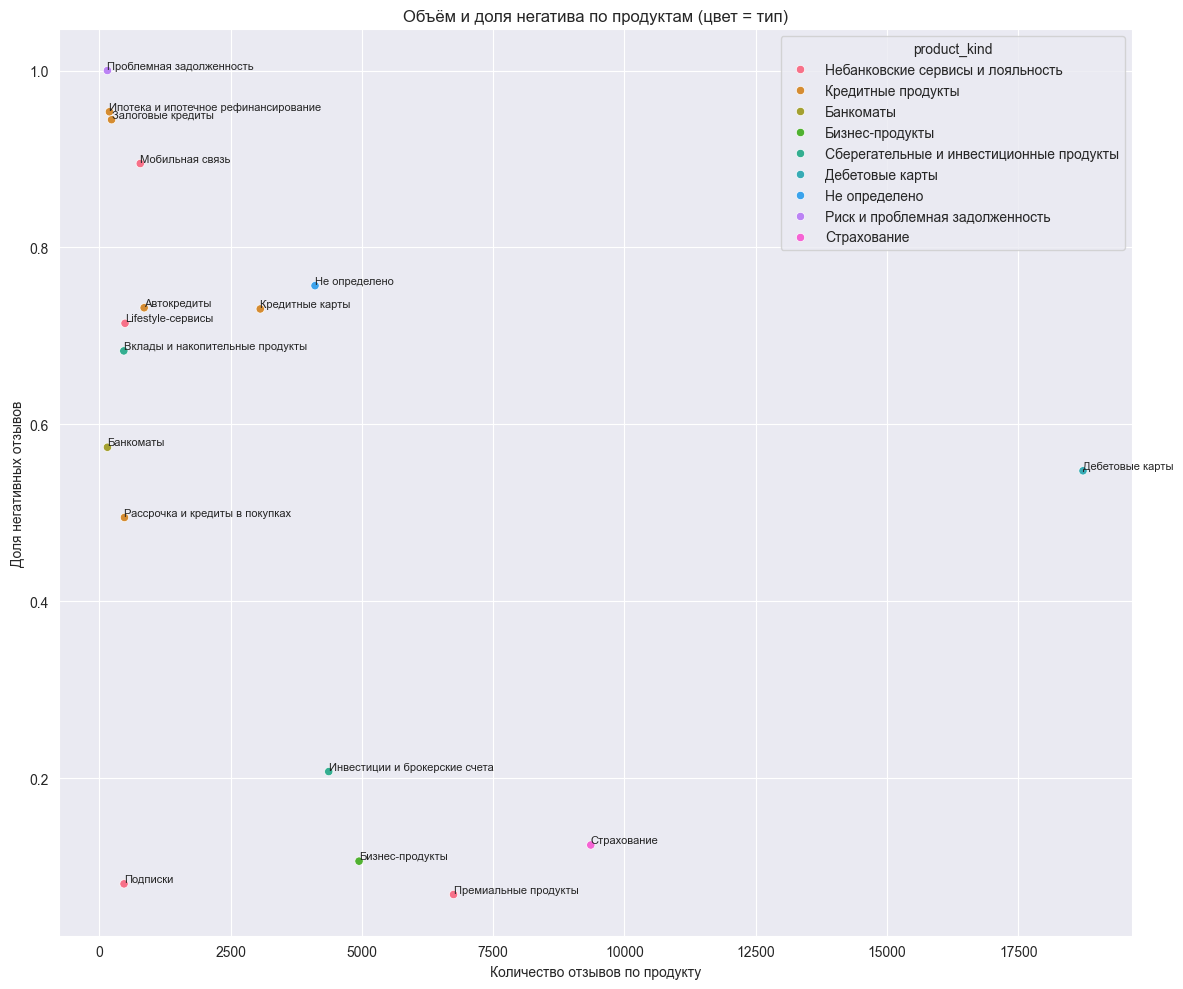

In [15]:
plt.figure(figsize=(12, 10))
sns.scatterplot(
    data=prod_stats,
    x='count',
    y='share_negative',
    hue='product_kind'
)

for _, row in (
    prod_stats
    .sort_values(['share_negative', 'count'], ascending=[False, False])
    .iterrows()
):
    plt.text(
        row['count'],
        row['share_negative'],
        row['product'],
        fontsize=8,
        ha='left',
        va='bottom'
    )

plt.xlabel('Количество отзывов по продукту')
plt.ylabel('Доля негативных отзывов')
plt.title('Объём и доля негатива по продуктам (цвет = тип)')
plt.tight_layout()
plt.show()

In [16]:
final_prod_stats = (
    df
    .groupby(['product', 'is_credit_product'])
    .agg(
        n=('review_emotion', 'size'),
        neg=('review_emotion', lambda x: (x == 0).sum())
    )
    .assign(share_negative=lambda t: t['neg'] / t['n'])
    .reset_index()
)

final_prod_stats


,product,is_credit_product,n,neg,share_negative
0,Lifestyle-сервисы,False,490,350,0.714286
1,Автокредиты,True,854,625,0.731850
2,Банкоматы,False,155,89,0.574194
3,Бизнес-продукты,False,4946,526,0.106349
4,Вклады и накопительные продукты,False,467,319,0.683084
5,Дебетовые карты,False,18732,10257,0.547566
6,Залоговые кредиты,True,234,221,0.944444
7,Инвестиции и брокерские счета,False,4369,907,0.207599
8,Ипотека и ипотечное рефинансирование,True,193,184,0.953368
9,Кредитные карты,True,3065,2239,0.730506


In [17]:
df['is_negative'] = (df['review_emotion'] == 0).astype(int)

agg = (
    df
    .groupby('is_credit_product')['is_negative']
    .agg(['size', 'sum'])
    .rename(columns={'size': 'n', 'sum': 'neg'})
)
agg['share_neg'] = agg['neg'] / agg['n']
agg = agg.reset_index()
agg

,is_credit_product,n,neg,share_neg
0,False,51840,18637,0.359510
1,True,4980,3661,0.735141


In [18]:
from statsmodels.stats.proportion import proportions_ztest

agg_sorted = agg.sort_values('is_credit_product', ascending=False)
count = agg_sorted['neg'].values
nobs  = agg_sorted['n'].values

z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')
# print(z_stat, p_value)
z_stat, p_value


ModuleNotFoundError: No module named 'statsmodels'

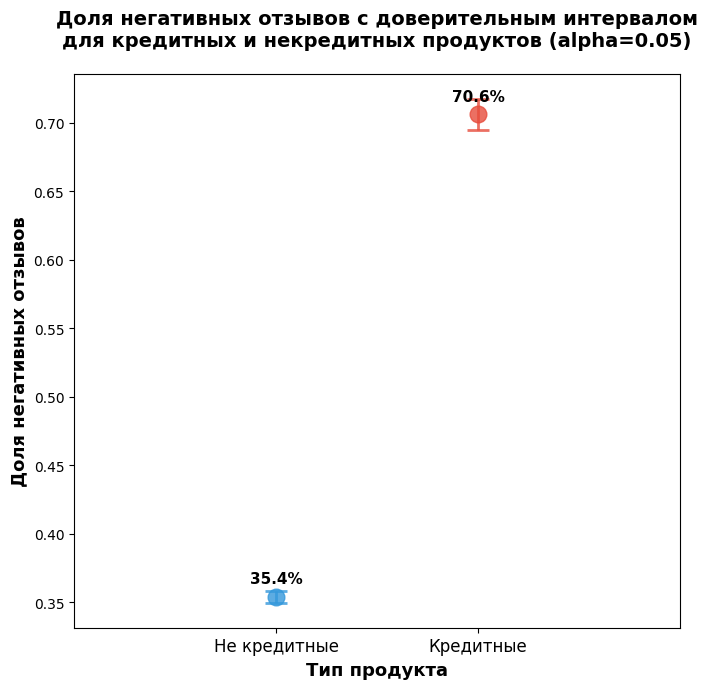

In [27]:
from statsmodels.stats.proportion import proportion_confint

alpha = 0.05
agg['ci_low'], agg['ci_high'] = proportion_confint(
    count=agg['neg'],
    nobs=agg['n'],
    alpha=alpha,
    method='normal'
)

data_min = agg['ci_low'].min()
data_max = agg['ci_high'].max()
y_range = data_max - data_min
y_min = data_min - 0.05 * y_range
y_max = data_max + 0.05 * y_range

plt.figure(figsize=(7, 7))

x_labels = agg['is_credit_product'].map({False: 'Не кредитные', True: 'Кредитные'})
colors = ['#3498db', '#e74c3c']

x_positions = [0, 0.4]
for idx, (x_pos, label, color) in enumerate(zip(x_positions, x_labels, colors)):
    plt.errorbar(
        x=x_pos,
        y=agg.loc[idx, 'share_neg'],
        yerr=[[agg.loc[idx, 'share_neg'] - agg.loc[idx, 'ci_low']], 
              [agg.loc[idx, 'ci_high'] - agg.loc[idx, 'share_neg']]],
        fmt='o',
        markersize=12,
        capsize=8,
        capthick=2,
        linewidth=2,
        color=color,
        ecolor=color,
        alpha=0.8
    )

    plt.text(x_pos, agg.loc[idx, 'share_neg'] + 0.01, 
             f"{agg.loc[idx, 'share_neg']:.1%}", 
             ha='center', fontsize=11, fontweight='bold')

plt.xticks(x_positions, x_labels, fontsize=12)
plt.xlim(-0.4, 0.8)
plt.ylim(y_min, y_max)
plt.ylabel('Доля негативных отзывов', fontsize=13, fontweight='bold')
plt.xlabel('Тип продукта', fontsize=13, fontweight='bold')
plt.title(f'Доля негативных отзывов с доверительным интервалом\nдля кредитных и некредитных продуктов (alpha={alpha})', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()



In [28]:
len(df[df["is_credit_product"]].dropna(subset=['review_text']))

5853

Что было сделано:
- На основе построенных графиков и проведенного анализа кредитных продуктов был сделан вывод о том, что кредитные продукты в среднем имеют большую долю негативных отзывов с сравнении с негативными продуктами
- Также был проведен статтест (парный Z test) и получено p-значение по выбранной категории продуктов, которое показывает подтвержденную значимость отклонений относительно случайных
